In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets

In [3]:

# Load and preprocess the data
(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()

train_data, test_data = train_data / 255.0, test_data / 255.0

# Create a data generator
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(len(train_data))
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
# Train the model
model.fit(train_dataset, epochs=2, validation_data=test_dataset)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)


Epoch 1/2
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3984 - accuracy: 0.4974 - val_loss: 1.1953 - val_accuracy: 0.5839
Epoch 2/2
313/313 [==============================] - 5s 16ms/step - loss: 1.0888 - accuracy: 0.6294
Test accuracy: 0.6294000148773193


1/1 [==============================] - 0s 25ms/step
Predicted class: truck


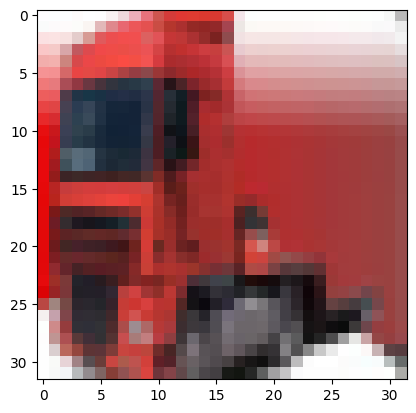

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a random test image to predict
img_index = np.random.randint(0, test_data.shape[0])
test_img = test_data[img_index]

# Make the prediction
prediction = model.predict(np.array([test_img]))
predicted_class = np.argmax(prediction[0])

import matplotlib.pyplot as plt
# Print the result
print("Predicted class:", class_names[predicted_class])
plt.imshow(test_img)